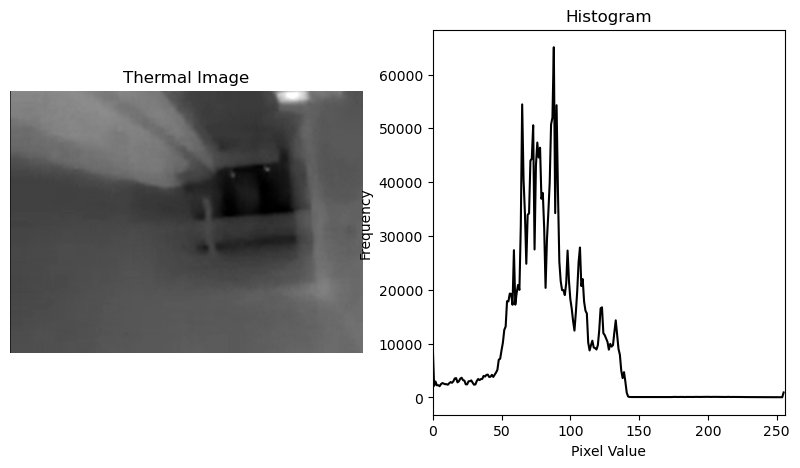

In [4]:
import cv2
import matplotlib.pyplot as plt

# Read the thermal image (assuming it's grayscale)
image = cv2.imread("./image.png", cv2.IMREAD_GRAYSCALE)

# Plot the original thermal image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# plt.imshow(image, cmap='inferno')  # Use a thermal colormap
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.title("Thermal Image")

# Compute histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot histogram
plt.subplot(1, 2, 2)
plt.title("Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist, color='black')
plt.xlim([0, 256])

plt.show()


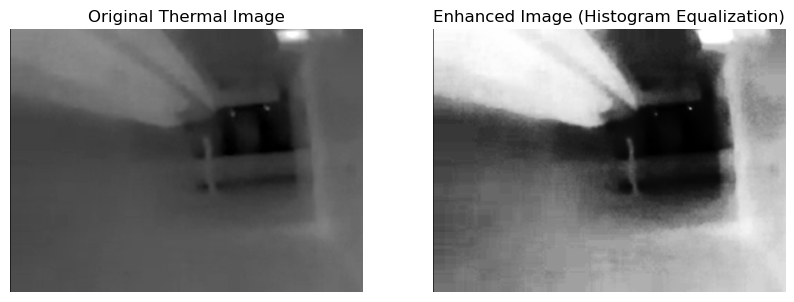

In [9]:
import cv2
import matplotlib.pyplot as plt

# Read the thermal image (grayscale)
image = cv2.imread("./image.png", cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized = cv2.equalizeHist(image)

# Plot original and enhanced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.title("Original Thermal Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.axis("off")
plt.title("Enhanced Image (Histogram Equalization)")

plt.show()


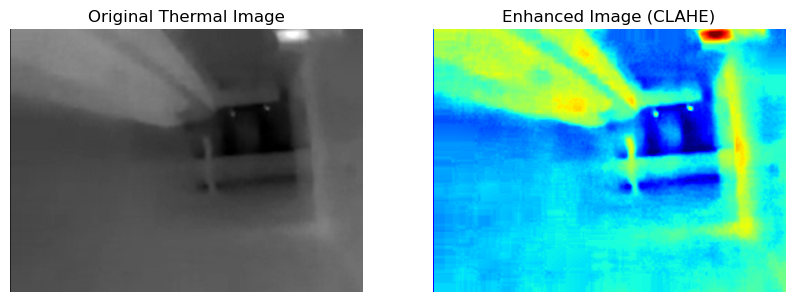

In [16]:
# Apply CLAHE (Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(image)

# Plot original and enhanced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.title("Original Thermal Image")

plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='jet')
plt.axis("off")
plt.title("Enhanced Image (CLAHE)")

plt.show()


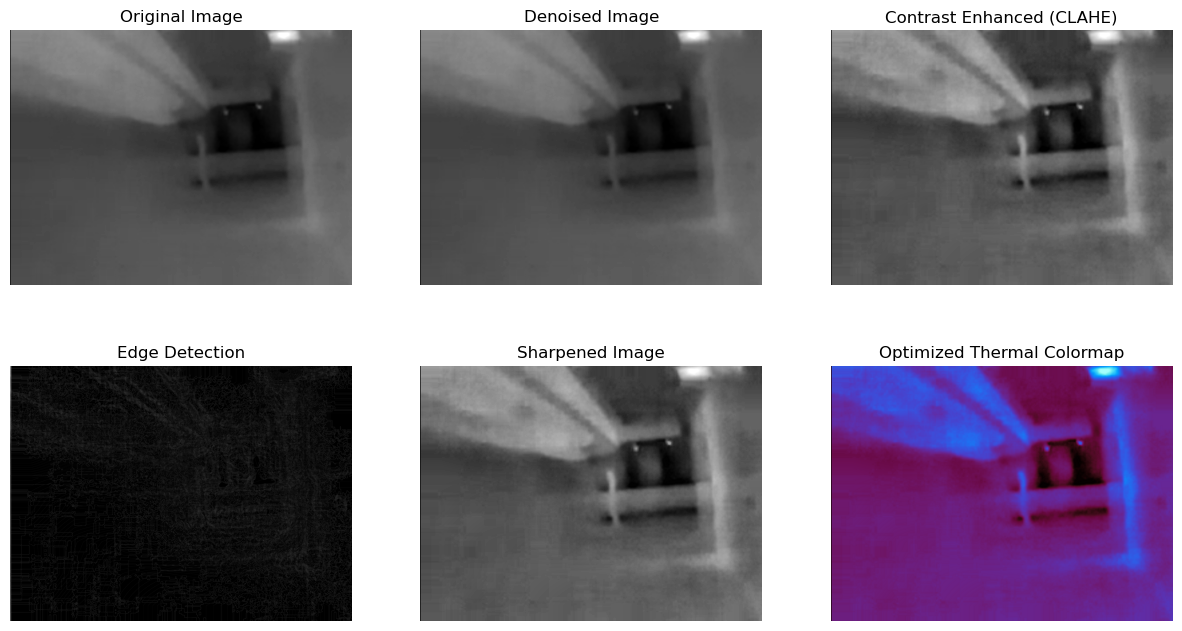

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the thermal image (Grayscale)
image = cv2.imread("./image.png", cv2.IMREAD_GRAYSCALE)

# Step 2: Noise Removal (Denoising)
denoised = cv2.GaussianBlur(image, (5, 5), 0)  # Gaussian Blur for smoothing

# Step 3: Contrast Enhancement (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(denoised)

# Step 4: Edge Detection (Laplacian Filter)
edges = cv2.Laplacian(enhanced, cv2.CV_64F)
edges = np.uint8(np.absolute(edges))  # Convert to 8-bit image

# Step 5: Sharpening (Unsharp Masking)
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])
sharpened = cv2.filter2D(enhanced, -1, sharpening_kernel)

# Step 6: Apply a Thermal Color Map (Optional)
thermal_colored = cv2.applyColorMap(sharpened, cv2.COLORMAP_INFERNO)

# Display Results
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.title("Original Image")

plt.subplot(2, 3, 2)
plt.imshow(denoised, cmap='gray')
plt.axis("off")
plt.title("Denoised Image")

plt.subplot(2, 3, 3)
plt.imshow(enhanced, cmap='gray')
plt.axis("off")
plt.title("Contrast Enhanced (CLAHE)")

plt.subplot(2, 3, 4)
plt.imshow(edges, cmap='gray')
plt.axis("off")
plt.title("Edge Detection")

plt.subplot(2, 3, 5)
plt.imshow(sharpened, cmap='gray')
plt.axis("off")
plt.title("Sharpened Image")

plt.subplot(2, 3, 6)
plt.imshow(thermal_colored)
plt.axis("off")
plt.title("Optimized Thermal Colormap")

plt.show()


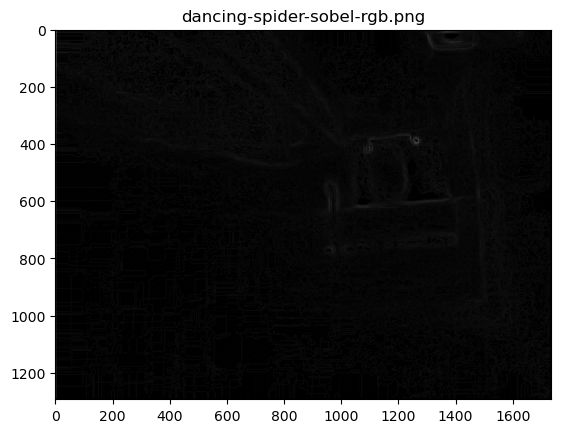

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = thermal_colored

# Sobel Operator
h, w, d = img.shape

# define filters
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1

# define images with 0s
newgradientImage = np.zeros((h, w, d))

# offset by 1
for channel in range(d):
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            horizontalGrad = (horizontal[0, 0] * img[i - 1, j - 1, channel]) + \
                             (horizontal[0, 1] * img[i - 1, j, channel]) + \
                             (horizontal[0, 2] * img[i - 1, j + 1, channel]) + \
                             (horizontal[1, 0] * img[i, j - 1, channel]) + \
                             (horizontal[1, 1] * img[i, j, channel]) + \
                             (horizontal[1, 2] * img[i, j + 1, channel]) + \
                             (horizontal[2, 0] * img[i + 1, j - 1, channel]) + \
                             (horizontal[2, 1] * img[i + 1, j, channel]) + \
                             (horizontal[2, 2] * img[i + 1, j + 1, channel])

            verticalGrad = (vertical[0, 0] * img[i - 1, j - 1, channel]) + \
                           (vertical[0, 1] * img[i - 1, j, channel]) + \
                           (vertical[0, 2] * img[i - 1, j + 1, channel]) + \
                           (vertical[1, 0] * img[i, j - 1, channel]) + \
                           (vertical[1, 1] * img[i, j, channel]) + \
                           (vertical[1, 2] * img[i, j + 1, channel]) + \
                           (vertical[2, 0] * img[i + 1, j - 1, channel]) + \
                           (vertical[2, 1] * img[i + 1, j, channel]) + \
                           (vertical[2, 2] * img[i + 1, j + 1, channel])

            # Edge Magnitude
            mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
            # Avoid underflow: clip result
            newgradientImage[i - 1, j - 1, channel] = mag

# now add the images r g and b
rgb_edge = newgradientImage[:,:,0] + newgradientImage[:,:,1] + newgradientImage[:,:,2]

plt.figure()
plt.title('dancing-spider-sobel-rgb.png')
plt.imsave('dancing-spider-sobel-rgb.png', rgb_edge, cmap='gray', format='png')
plt.imshow(rgb_edge, cmap='gray')
plt.show()

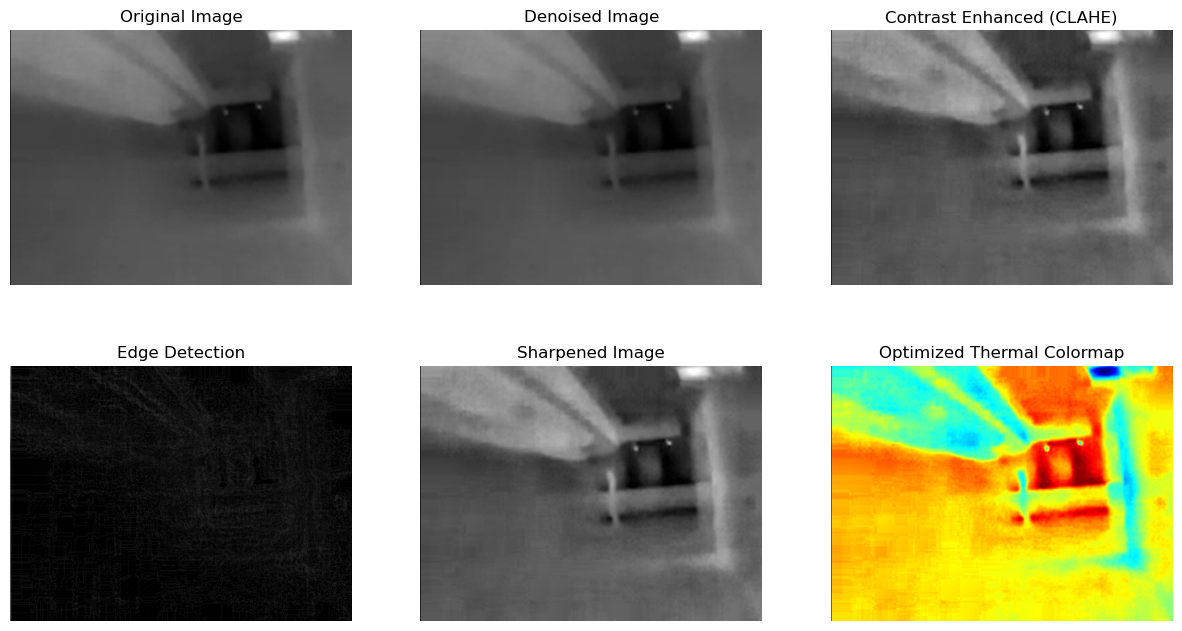

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the thermal image (Grayscale)
image = cv2.imread("./image.png", cv2.IMREAD_GRAYSCALE)

# Step 2: Noise Removal (Denoising)
denoised = cv2.GaussianBlur(image, (5, 5), 0)  # Gaussian Blur for smoothing

# Step 3: Contrast Enhancement (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(denoised)

# Step 4: Edge Detection (Laplacian Filter)
edges = cv2.Laplacian(enhanced, cv2.CV_64F)
edges = np.uint8(np.absolute(edges))  # Convert to 8-bit image

# Step 5: Sharpening (Unsharp Masking)
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])
sharpened = cv2.filter2D(enhanced, -1, sharpening_kernel)

# Step 6: Apply a Thermal Color Map (Optional)
thermal_colored = cv2.applyColorMap(sharpened, cv2.COLORMAP_INFERNO)

# Display Results
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.title("Original Image")

plt.subplot(2, 3, 2)
plt.imshow(denoised, cmap='gray')
plt.axis("off")
plt.title("Denoised Image")

plt.subplot(2, 3, 3)
plt.imshow(enhanced, cmap='gray')
plt.axis("off")
plt.title("Contrast Enhanced (CLAHE)")

plt.subplot(2, 3, 4)
plt.imshow(edges, cmap='gray')
plt.axis("off")
plt.title("Edge Detection")

plt.subplot(2, 3, 5)
plt.imshow(sharpened, cmap='gray')
plt.axis("off")
plt.title("Sharpened Image")

plt.subplot(2, 3, 6)
plt.imshow(thermal_colored)
plt.axis("off")
plt.title("Optimized Thermal Colormap")

plt.show()
